<a href="https://colab.research.google.com/github/DarishFathin/capstone/blob/main/bengkod_obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5 Data Teratas:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II



Informasi Umum:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                            

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351



Jumlah Missing Values Tiap Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah Nilai Unik per Kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                 

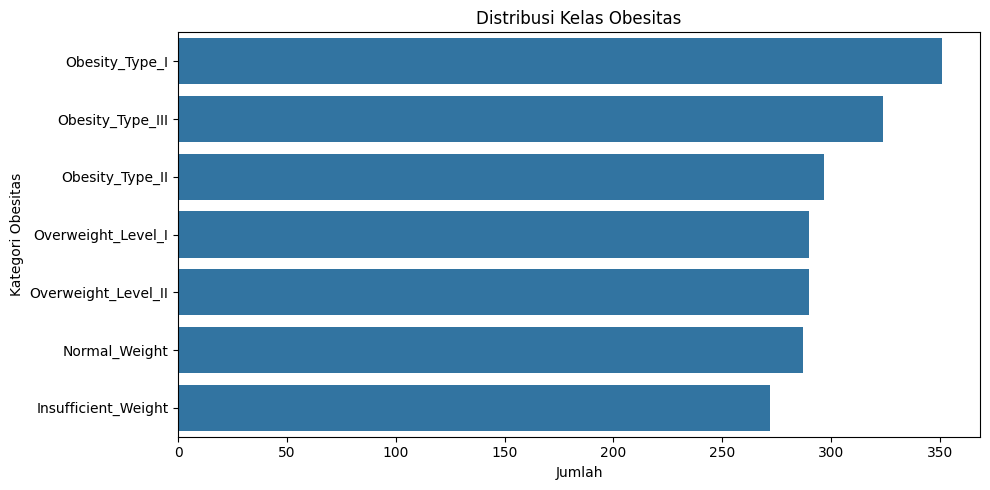

<Figure size 1500x1000 with 0 Axes>

In [1]:
# 1. Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
df = pd.read_csv('/content/drive/MyDrive/obesity/ObesityDataSet.csv')

# 3. Tampilkan beberapa baris pertama
print("5 Data Teratas:")
display(df.head())

# 4. Informasi umum dataset
print("\nInformasi Umum:")
df.info()

print("\nStatistik Deskriptif:")
display(df.describe(include='all'))

# 5. Cek missing values
print("\nJumlah Missing Values Tiap Kolom:")
print(df.isnull().sum())

# 6. Cek unique values per kolom
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())

# 7. Cek data duplikat
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")

# 8. Cek keseimbangan data target
plt.figure(figsize=(10,5))
sns.countplot(y='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kelas Obesitas')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Obesitas')
plt.tight_layout()
plt.show()

# 9. Boxplot untuk deteksi outlier
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Kesimpulan EDA
kesimpulan = """
 **KESIMPULAN EXPLORATORY DATA ANALYSIS (EDA)**

1. **Struktur Dataset**:
   - Dataset memiliki 2111 baris dan 17 kolom.
   - Terdapat kombinasi fitur bertipe kategorikal, biner, integer, dan kontinu.

2. **Kebersihan Data**:
   - Tidak ditemukan missing values di seluruh kolom.
   - Tidak ada data duplikat dalam dataset.

3. **Distribusi Target**:
   - Target `NObeyesdad` terdiri dari 7 kelas obesitas.
   - Distribusi target tidak seimbang. Beberapa kelas seperti `Obesity Type I` dan `Normal Weight` memiliki jumlah data lebih besar dibanding kelas lain seperti `Insufficient Weight`.

4. **Outlier**:
   - Terdapat kemungkinan outlier pada fitur numerik seperti `Weight`, `Age`, dan `TUE` berdasarkan visualisasi boxplot.
   - Outlier ini mungkin perlu ditangani pada tahap preprocessing jika memengaruhi performa model.

5. **Insight Awal**:
   - Beberapa fitur seperti `family_history_with_overweight`, `FAVC`, `SMOKE`, dan `SCC` adalah biner dan bisa dikonversi ke 0/1.
   - Fitur `MTRANS`, `CALC`, `CAEC`, dan `Gender` adalah kategorikal dan perlu encoding sebelum digunakan untuk training model.
"""

from IPython.display import Markdown
display(Markdown(kesimpulan))



 **KESIMPULAN EXPLORATORY DATA ANALYSIS (EDA)**

1. **Struktur Dataset**:
   - Dataset memiliki 2111 baris dan 17 kolom.
   - Terdapat kombinasi fitur bertipe kategorikal, biner, integer, dan kontinu.

2. **Kebersihan Data**:
   - Tidak ditemukan missing values di seluruh kolom.
   - Tidak ada data duplikat dalam dataset.

3. **Distribusi Target**:
   - Target `NObeyesdad` terdiri dari 7 kelas obesitas.
   - Distribusi target tidak seimbang. Beberapa kelas seperti `Obesity Type I` dan `Normal Weight` memiliki jumlah data lebih besar dibanding kelas lain seperti `Insufficient Weight`.

4. **Outlier**:
   - Terdapat kemungkinan outlier pada fitur numerik seperti `Weight`, `Age`, dan `TUE` berdasarkan visualisasi boxplot.
   - Outlier ini mungkin perlu ditangani pada tahap preprocessing jika memengaruhi performa model.

5. **Insight Awal**:
   - Beberapa fitur seperti `family_history_with_overweight`, `FAVC`, `SMOKE`, dan `SCC` adalah biner dan bisa dikonversi ke 0/1.
   - Fitur `MTRANS`, `CALC`, `CAEC`, dan `Gender` adalah kategorikal dan perlu encoding sebelum digunakan untuk training model.


In [2]:
# Import library tambahan
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Cek dan tangani duplikasi (sudah dicek sebelumnya, tapi pastikan lagi)
df = df.drop_duplicates()

# 2. Tangani missing values (sudah dicek sebelumnya, tidak ada)
# Jika ada nanti, kita bisa gunakan imputasi

# 3. Tangani outlier dengan metode IQR (untuk fitur numerik saja)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

numerik = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerik:
    df = remove_outliers_iqr(df, col)

# 4. Encode data kategorikal & biner menggunakan LabelEncoder
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 5. Pisahkan fitur dan target
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# 6. Cek kembali fitur yang mungkin redundant
# (Untuk sekarang kita gunakan semua fitur karena belum ada yang jelas harus dibuang)

# 7. Tangani ketidakseimbangan data menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 8. Normalisasi/Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 9. Split data untuk training dan testing (opsional untuk tahap selanjutnya)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)


In [6]:
# Cek 5 data pertama setelah preprocessing
import pandas as pd
pd.DataFrame(X_scaled, columns=X.columns).head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,-0.588265,-0.939797,-1.038911,0.280487,1.314838,-2.323374,-0.99196,0.468218,-0.190745,-0.105944,-0.120948,0.475801,-1.359530,0.841061,0.324406,0.515064
1,-0.588265,-0.939797,-1.622886,0.098586,-0.402630,-2.323374,1.17489,0.468218,3.849434,5.432449,1.717886,0.475801,1.545377,-1.223280,0.324406,0.515064
2,0.130044,0.978044,1.159844,0.621552,-2.120098,-2.323374,-0.99196,0.468218,-0.190745,-0.105944,-0.120948,0.475801,1.257348,0.841061,0.324406,0.515064
3,0.902287,0.978044,1.159844,1.273364,-2.120098,-2.323374,1.17489,0.468218,-0.190745,-0.105944,-0.120948,-1.866971,1.257348,-1.223280,0.324406,1.298663
4,-0.161693,0.978044,0.932005,1.394631,-0.402630,-2.323374,-0.99196,-2.224219,-0.190745,-0.105944,-0.120948,-1.866971,-1.359530,-1.223280,0.324406,0.515064


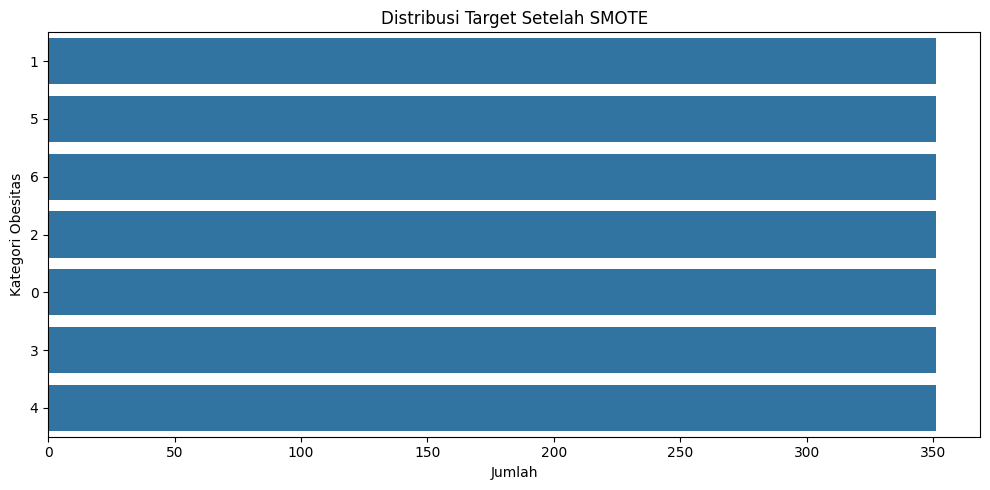

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label setelah SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(y=y_resampled, order=pd.Series(y_resampled).value_counts().index)
plt.title('Distribusi Target Setelah SMOTE')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Obesitas')
plt.tight_layout()
plt.show()


In [5]:
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (1965, 16)
Shape y_train: (1965,)
Shape X_test: (492, 16)
Shape y_test: (492,)


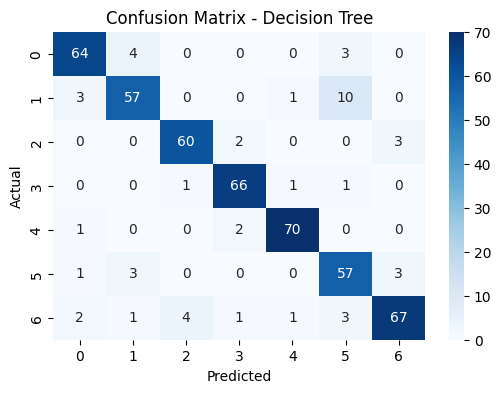


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        71
           1       0.88      0.80      0.84        71
           2       0.92      0.92      0.92        65
           3       0.93      0.96      0.94        69
           4       0.96      0.96      0.96        73
           5       0.77      0.89      0.83        64
           6       0.92      0.85      0.88        79

    accuracy                           0.90       492
   macro avg       0.90      0.90      0.90       492
weighted avg       0.90      0.90      0.90       492



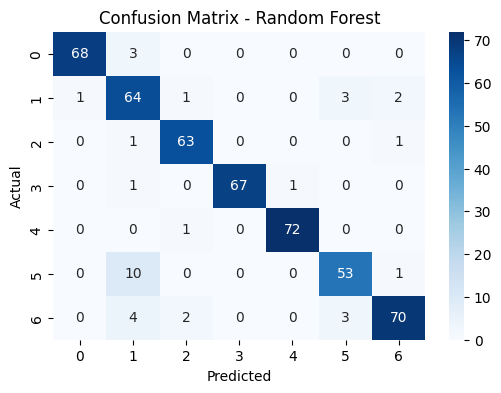


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.77      0.90      0.83        71
           2       0.94      0.97      0.95        65
           3       1.00      0.97      0.99        69
           4       0.99      0.99      0.99        73
           5       0.90      0.83      0.86        64
           6       0.95      0.89      0.92        79

    accuracy                           0.93       492
   macro avg       0.93      0.93      0.93       492
weighted avg       0.93      0.93      0.93       492



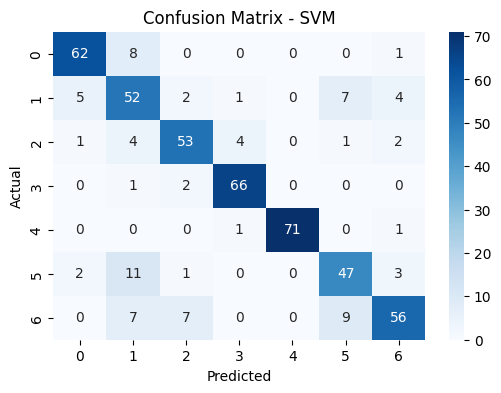


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        71
           1       0.63      0.73      0.68        71
           2       0.82      0.82      0.82        65
           3       0.92      0.96      0.94        69
           4       1.00      0.97      0.99        73
           5       0.73      0.73      0.73        64
           6       0.84      0.71      0.77        79

    accuracy                           0.83       492
   macro avg       0.83      0.83      0.83       492
weighted avg       0.83      0.83      0.83       492



In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

# Fungsi evaluasi dan visualisasi
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Tambahkan ke hasil
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1-score"].append(f1)

    # Print classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred, zero_division=0))

# Train dan evaluasi semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)


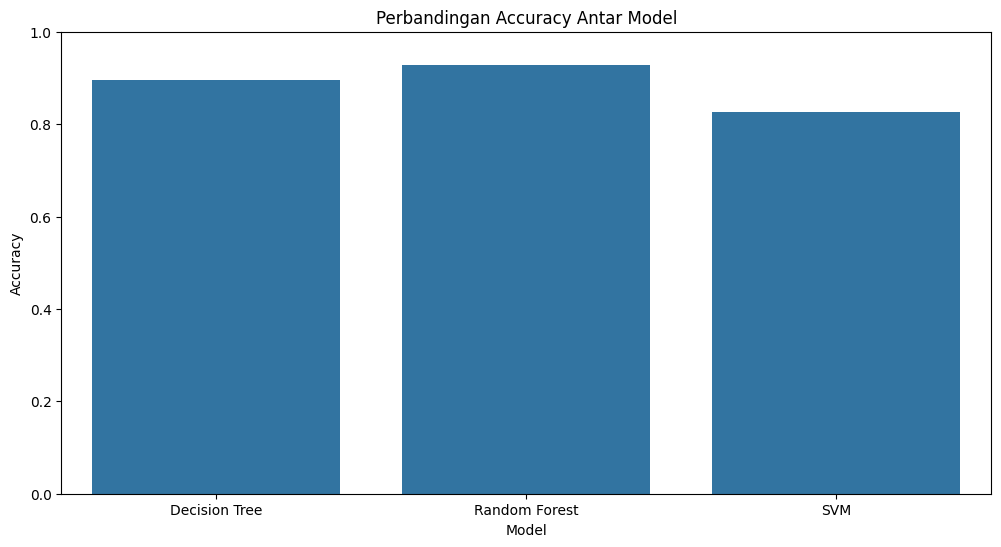

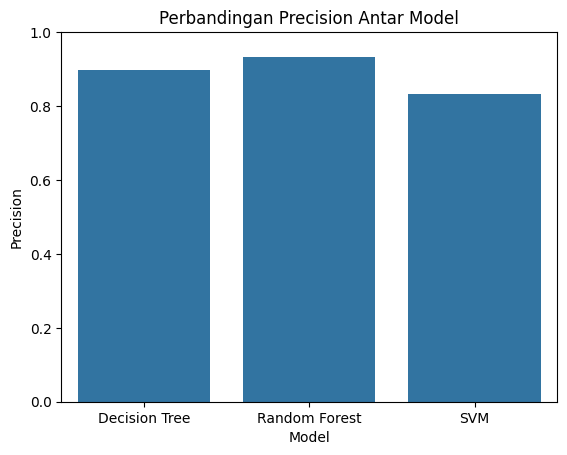

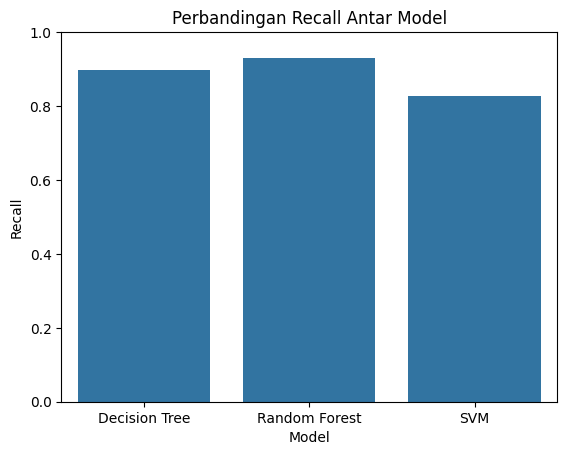

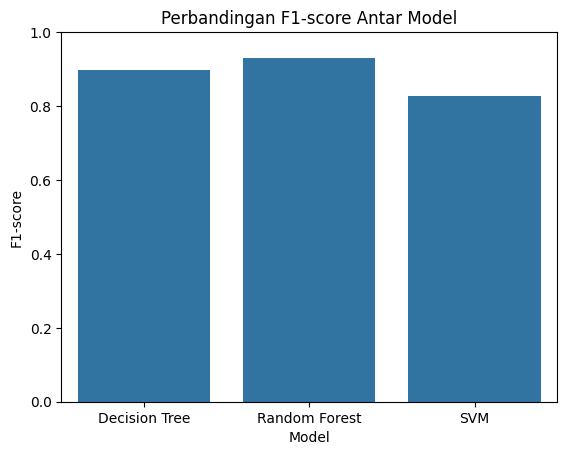

In [8]:
# Visualisasi perbandingan skor
df_results = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']:
    sns.barplot(x='Model', y=metric, data=df_results)
    plt.title(f'Perbandingan {metric} Antar Model')
    plt.ylim(0, 1)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()


In [9]:
# Kesimpulan dari Preprocessing Data dan Pemodelan & Evaluasi
kesimpulan = """
 KESIMPULAN PREPROCESSING DATA

1. Data Bersih & Siap Pakai
   - Tidak ada missing values atau duplikat.
   - Outlier ditangani dengan metode IQR pada kolom numerik.

2. Transformasi Fitur
   - Semua fitur kategorikal telah dikonversi ke numerik menggunakan LabelEncoder.

3. Ketidakseimbangan Data
   - Ketidakseimbangan kelas target 'NObeyesdad' diatasi dengan SMOTE.
   - Distribusi antar kelas menjadi seimbang.

4. Normalisasi Fitur
   - Data dinormalisasi menggunakan StandardScaler agar berada dalam skala yang sama.

 KESIMPULAN PEMODELAN & EVALUASI

1. Model yang Digunakan
   - Decision Tree, Random Forest, dan SVM digunakan untuk klasifikasi.

2. Evaluasi Kinerja
   - Evaluasi menggunakan Confusion Matrix, Accuracy, Precision, Recall, dan F1-score.
   - Random Forest memiliki performa terbaik secara keseluruhan.

3. Visualisasi Performa
   - Visualisasi perbandingan memperkuat bahwa Random Forest layak menjadi model utama.
"""

print(kesimpulan)



 KESIMPULAN PREPROCESSING DATA

1. Data Bersih & Siap Pakai
   - Tidak ada missing values atau duplikat.
   - Outlier ditangani dengan metode IQR pada kolom numerik.

2. Transformasi Fitur
   - Semua fitur kategorikal telah dikonversi ke numerik menggunakan LabelEncoder.

3. Ketidakseimbangan Data
   - Ketidakseimbangan kelas target 'NObeyesdad' diatasi dengan SMOTE.
   - Distribusi antar kelas menjadi seimbang.

4. Normalisasi Fitur
   - Data dinormalisasi menggunakan StandardScaler agar berada dalam skala yang sama.

 KESIMPULAN PEMODELAN & EVALUASI

1. Model yang Digunakan
   - Decision Tree, Random Forest, dan SVM digunakan untuk klasifikasi.

2. Evaluasi Kinerja
   - Evaluasi menggunakan Confusion Matrix, Accuracy, Precision, Recall, dan F1-score.
   - Random Forest memiliki performa terbaik secara keseluruhan.

3. Visualisasi Performa
   - Visualisasi perbandingan memperkuat bahwa Random Forest layak menjadi model utama.

